# Proyecto 1 - Avance en vacunación mundial

**Integrantes: Walter Valencia Naranjo, Santiago Bautista, Lida Díaz**

Esta base contiene información acerca del progreso en materia de vacunación contra el covid-19 para 182 países, la diferencia entre las personas con una sola dosis y completamente vacunadas (dos dosis).

Las variables suministradas son 1. País, 2. Primera dosis administrada por cada 100 mil personas, 3. Personas completamente vacunada, 4. Porcentaje de población vacunada (1 dosis) y 5. Porcentaje de población completamente vacunada (2 dosis). 

_Se importan las librerías necesarias para el desarrollo de los distintos análisis:_

In [1]:
#Importando el módulo
import pandas as pd

In [2]:
#Importando numpy
import numpy as np


_Luego de subida la base de datos a la nube, se incluye en el colab_

In [3]:
#Cargue la data
datos_covid = pd.read_csv("/content/Worldwide Vaccine Data.csv")

**A continuación se presenta la información estadística y relevante de la base de datos de la población vacunada mundialmente:**

In [4]:
#Información de la data 
datos_covid.head(15)

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
0,U.A.E.,140.0,"13,684,429",NaN,NaN
1,Israel,117.0,"10,618,819",60.0,57.0
2,Malta,115.0,"576,256",67.0,50.0
3,Bahrain,114.0,"1,876,554",62.0,52.0
4,Aruba,112.0,"119,395",61.0,51.0
5,Mongolia,109.0,"3,528,572",59.0,51.0
6,Chile,107.0,"20,223,473",61.0,47.0
7,U.K.,105.0,"70,253,625",61.0,44.0
8,Curaçao,102.0,"160,585",55.0,47.0
9,Qatar,98.0,"2,768,028",56.0,42.0


_Analizando la estadística descriptiva:_

In [5]:
#Promedio de %_segunda dosis
datos_covid["% of population fully vaccinated"].mean()

11.69602649006622

A pesar de que el promedio de la población completamente vacunada, en los 182 países, sea de 11.6960 el dato máximo es de 57% (%_segunda_dosis), y la distancia entre ellos es muy amplia, por lo tanto, puede distorsionar el análisis.

Para el tratamiendo de la data, se crea un diccionario renombrando las variaables de forma tal que sea más dinámica para el ejercicio: 

In [6]:
#Renombrando la variables
datos_covid = datos_covid.rename(columns = {'Doses administered per 100 people': 'Dosisx100', '% of population vaccinated': '%_poblacion_vacunada', 'Country' : 'Pais', '% of population fully vaccinated' : '%_segunda_dosis', 'Total doses administered': 'Total_dosis_administradas'}, inplace = False)

datos_covid.head()

,Pais,Dosisx100,Total_dosis_administradas,%_poblacion_vacunada,%_segunda_dosis
0,U.A.E.,140.0,"13,684,429",NaN,NaN
1,Israel,117.0,"10,618,819",60.0,57.0
2,Malta,115.0,"576,256",67.0,50.0
3,Bahrain,114.0,"1,876,554",62.0,52.0
4,Aruba,112.0,"119,395",61.0,51.0


In [7]:
#Datos generales de la base 
datos_covid.describe()

,Dosisx100,%_poblacion_vacunada,%_segunda_dosis
count,182.000000,173.000000,151.000000
mean,29.056044,18.572254,11.696026
std,32.249294,19.208923,13.913810
min,0.000000,0.000000,0.000000
25%,3.125000,2.800000,0.800000
50%,16.000000,11.000000,5.200000
75%,48.750000,30.000000,20.000000
max,140.000000,67.000000,57.000000


In [8]:
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pais                       182 non-null    object 
 1   Dosisx100                  182 non-null    float64
 2   Total_dosis_administradas  182 non-null    object 
 3   %_poblacion_vacunada       173 non-null    float64
 4   %_segunda_dosis            151 non-null    float64
dtypes: float64(3), object(2)
memory usage: 7.2+ KB


Evidenciando los datos anteriores, se observa que la variable Total_dosis_administradas está siendo tomada como un objeto, por lo cual, se procede a convertirse a float64 para que sea tomada como un valor numérico: 

In [9]:
#La vairables total_dosis_administradas está guardada como objeto
datos_covid['Total_dosis_administradas'] 


0      13,684,429
1      10,618,819
2         576,256
3       1,876,554
4         119,395
          ...    
177        26,624
178        11,889
179         7,881
180        31,871
181         5,324
Name: Total_dosis_administradas, Length: 182, dtype: object

In [12]:
#Vamos a cambiar la variable total_dosis_administradas de objeto a float64

datos_covid['Total_dosis_administradas'] = pd.to_numeric(datos_covid['Total_dosis_administradas'], errors = 'coerce')

In [17]:
datos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pais                       182 non-null    object 
 1   Dosisx100                  182 non-null    float64
 2   Total_dosis_administradas  1 non-null      float64
 3   %_poblacion_vacunada       173 non-null    float64
 4   %_segunda_dosis            151 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.2+ KB


Se evidencia que al final, la variable toma una forma de floar64, por lo cual ya es reconocida como un valor numérico.

In [18]:
datos_covid.head(15)

,Pais,Dosisx100,Total_dosis_administradas,%_poblacion_vacunada,%_segunda_dosis
0,U.A.E.,140.0,NaN,NaN,NaN
1,Israel,117.0,NaN,60.0,57.0
2,Malta,115.0,NaN,67.0,50.0
3,Bahrain,114.0,NaN,62.0,52.0
4,Aruba,112.0,NaN,61.0,51.0
5,Mongolia,109.0,NaN,59.0,51.0
6,Chile,107.0,NaN,61.0,47.0
7,U.K.,105.0,NaN,61.0,44.0
8,Curaçao,102.0,NaN,55.0,47.0
9,Qatar,98.0,NaN,56.0,42.0


In [19]:
# Sumatoria de las dosis administradas

datos_covid.value_counts("Total_dosis_administradas")

Total_dosis_administradas
860.0    1
dtype: int64

**Observando que la base de datos es muy grande, y difícil de presentar en espacio gráfico, se realiza un mapa de calor para visibilizar mejor la información**

In [20]:
datos_covid

,Pais,Dosisx100,Total_dosis_administradas,%_poblacion_vacunada,%_segunda_dosis
0,U.A.E.,140.0,NaN,NaN,NaN
1,Israel,117.0,NaN,60.0,57.0
2,Malta,115.0,NaN,67.0,50.0
3,Bahrain,114.0,NaN,62.0,52.0
4,Aruba,112.0,NaN,61.0,51.0
...,...,...,...,...,...
177,Benin,0.2,NaN,0.2,0.0
178,South Sudan,0.1,NaN,0.1,NaN
179,Burkina Faso,0.0,NaN,0.0,NaN
180,Congo,0.0,NaN,0.0,0.0


In [21]:
!pip install pycountry #Este comadno se utilza con el fin de obtener un paquete que presente la información de un mapa.

     |████████████████████████████████| 10.1MB 30.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=fd221faa3c487f1f3b3d983e2c36bfdf0f92a714e561c8049e2ac41c70fed04b
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [22]:
import pycountry #Se realiza la importación del paquete del mapa
def get_alpha_3(location):
  try:
    return pycountry.countries.get(name=location).alpha_3
  except:
    return None #Este comando se realiza con el fin de encontrar paises que no presentan datos y darles un valor de 0
datos_covid['Code'] = datos_covid['Pais'].apply(lambda x: get_alpha_3(x))
print (datos_covid.head(6))

       Pais  Dosisx100  ...  %_segunda_dosis  Code
0    U.A.E.      140.0  ...              NaN  None
1    Israel      117.0  ...             57.0   ISR
2     Malta      115.0  ...             50.0   MLT
3   Bahrain      114.0  ...             52.0   BHR
4     Aruba      112.0  ...             51.0   ABW
5  Mongolia      109.0  ...             51.0   MNG

[6 rows x 6 columns]


In [23]:
import plotly.express as px

In [24]:
#Mapa de % de Vacunación por paises.
fig = px.choropleth(datos_covid,locations='Code',
                    color='%_poblacion_vacunada',hover_name='Pais',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

De acuerdo con el mapa de calor, se puede observar que la mayoría de países tienen un porcentaje de población vacunada demasiado bajo, y, por el contrario países como Estados Unidos tienen 52% de su población inmunizada, esto se debe a que ellos son los productores de la gran mayoría de vacunas avaladas por la Organización Mundial de la Salud. Igualmente, podemos ver que Colombia avanza en un ritmo de vacunación similar al del resto de la región. 

#Población vacunada vs población completamente vacunada (dos dosis)

Se realizan histogramas de relieve, que compara la información por países de personas que tienen al menos una vacuna, en contraste con la población que se encuentra completamente vacunada: 

In [25]:
#Importe módulo para graficar
import matplotlib.pyplot as plt

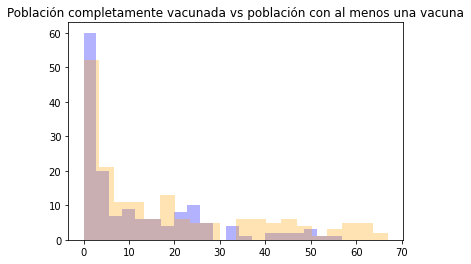

In [26]:
#Histograma de población completamente vacunada vs población con al menos una vacuna 
fig, ax = plt.subplots()
ax.hist(datos_covid["%_segunda_dosis"], bins = 20, alpha = 0.3, color = "b")
ax.hist(datos_covid["%_poblacion_vacunada"], bins = 20, alpha = 0.3, color = "orange")
ax.set_title("Población completamente vacunada vs población con al menos una vacuna")
plt.show()

De acuerdo con la información contenida en la gráfica, se puede concluir que menos de 10 países han vacunado hasta el 60% de su población con al menos 1 dosis. Y 50% con las dos dosis.   

**Grafico 3**

In [27]:
import seaborn as sns

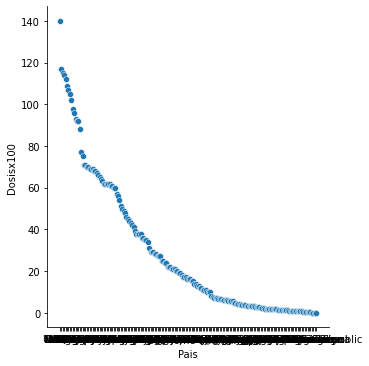

In [28]:
sns.relplot(x = "Pais", y = "Dosisx100",
            data = datos_covid,
            kind = "scatter")

La grafica anteriormente presentada, no es fácilmente entendible dado que contiene los 182 países, por tal razón se crea un grupo de países de interés, descartando los demás:

In [29]:
grupo_pais = ['Colombia', 'Argentina', 'Francia', 'Venezuela', 'Peru', 'Bolivia', 'Chile']

datos_covid.loc[datos_covid['Pais'].isin(grupo_pais)]

,Pais,Dosisx100,Total_dosis_administradas,%_poblacion_vacunada,%_segunda_dosis,Code
6,Chile,107.0,NaN,61.0,47.0,CHL
60,Argentina,35.0,NaN,28.0,7.1,ARG
74,Colombia,24.0,NaN,17.0,7.1,COL
89,Bolivia,17.0,NaN,13.0,3.9,None
93,Peru,15.0,NaN,10.0,5.1,PER
139,Venezuela,2.6,NaN,2.1,0.5,None
